In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [447]:
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans

In [448]:
data=pd.read_csv('BR.csv')

In [449]:
data.columns=[f'att_{i}' for i in range(data.shape[1])]
print(data.columns)

Index(['att_0', 'att_1', 'att_2', 'att_3', 'att_4', 'att_5', 'att_6', 'att_7',
       'att_8', 'att_9', 'att_10', 'att_11', 'att_12', 'att_13', 'att_14',
       'att_15', 'att_16', 'att_17', 'att_18', 'att_19', 'att_20', 'att_21',
       'att_22', 'att_23', 'att_24'],
      dtype='object')


In [450]:
skew_dict={f'att_{i}:{data[col].skew()}' for i,col in enumerate(data.columns)}


In [451]:
att_2_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_3_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_4_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_5_missing = SimpleImputer(missing_values=np.nan, strategy='median')
att_7_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_8_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_9_missing = SimpleImputer(missing_values=np.nan, strategy='median')
att_10_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_11_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_12_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_13_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_14_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_15_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_16_missing = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
att_17_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_18_missing = SimpleImputer(missing_values=np.nan, strategy='mean')
att_22_missing = SimpleImputer(missing_values=np.nan, strategy='mean')

In [452]:
missing_imputer = ColumnTransformer(transformers=[
    ('tnf2',att_2_missing,['att_2']),
    ('tnf3',att_3_missing,['att_3']),
    ('tnf4',att_4_missing,['att_4']),
    ('tnf5',att_5_missing,['att_5']),
    ('tnf7',att_7_missing,['att_7']),
    ('tnf8',att_8_missing,['att_8']),
    ('tnf9',att_9_missing,['att_9']),
    ('tnf10',att_10_missing,['att_10']),
    ('tnf11',att_11_missing,['att_11']),
    ('tnf12',att_12_missing,['att_12']),
    ('tnf13',att_13_missing,['att_13']),
    ('tnf14',att_14_missing,['att_14']),
    ('tnf15',att_15_missing,['att_15']),
    ('tnf16',att_16_missing,['att_16']),
    ('tnf17',att_17_missing,['att_17']),
    ('tnf18',att_18_missing,['att_18']),
    ('tnf22',att_22_missing,['att_22']),
],remainder='passthrough')

In [453]:
processed_data_1=pd.DataFrame(missing_imputer.fit_transform(data),columns = data.columns)



In [454]:
def outlier_modifier(df):
    q1=df.describe()['25%']
    q3=df.describe()['75%']
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    df = np.where(df >= upper_limit,
        upper_limit,
        np.where(df <= lower_limit,
        lower_limit,
        df))
    return df
    
    

In [455]:
for col in data.columns:
    processed_data_1[col]=outlier_modifier(processed_data_1[col])
    


In [456]:
att_0_scalar = MinMaxScaler()
att_4_scalar = MinMaxScaler()
att_6_scalar = MinMaxScaler()
att_8_scalar = FunctionTransformer(np.log1p)
att_10_scalar = MinMaxScaler()
att_11_scalar = FunctionTransformer(np.log1p)
att_15_scalar = FunctionTransformer(np.log1p)
att_17_scalar = MinMaxScaler()
att_21_scalar = FunctionTransformer(np.log1p)
att_22_scalar = MinMaxScaler()
att_23_scalar = FunctionTransformer(np.log1p)
att_24_scalar = FunctionTransformer(np.log1p)

In [457]:
distribution_handler = ColumnTransformer(transformers=[
    ('tnf_0',att_0_scalar,['att_0']),
    ('tnf_4',att_4_scalar,['att_4']),
    ('tnf_6',att_6_scalar,['att_6']),
    ('tnf_8',att_8_scalar,['att_8']),
    ('tnf_10',att_10_scalar,['att_10']),
    ('tnf_11',att_11_scalar,['att_11']),
    ('tnf_15',att_15_scalar,['att_15']),
    ('tnf_17',att_17_scalar,['att_17']),
    ('tnf_21',att_21_scalar,['att_21']),
    ('tnf_22',att_22_scalar,['att_22']),
    ('tnf_23',att_23_scalar,['att_23']),
    ('tnf_24',att_24_scalar,['att_24']),

],remainder='passthrough')

In [458]:
processed_data_2=pd.DataFrame(distribution_handler.fit_transform(processed_data_1),
                              columns = processed_data_1.columns)

In [459]:

n_clusters=3
model=KMeans(n_clusters=n_clusters, random_state=0).fit(processed_data_2)
print(model)


KMeans(n_clusters=3, random_state=0)


In [460]:
num=model.predict(np.array(processed_data_2.iloc[2]).reshape(1, -1))
a=np.array(processed_data_2.iloc[2]).reshape(1, -1)
b=model.cluster_centers_[num]
print( np.linalg.norm(a - b))
print(np.min(model.transform(np.array(processed_data_2.iloc[2]).reshape(1, -1))))


2.8771467068263337
2.8771467068263354


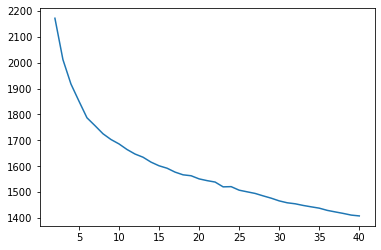

In [461]:
errors=[]
max_clusters=40
for i in range(2,max_clusters+1):
    n_clusters=i
    model=KMeans(n_clusters=n_clusters, random_state=0).fit(processed_data_2)
    p=model.transform(np.array(processed_data_2))
    error=np.sum(np.min(p,axis=1))
    errors.append(error)
    
plt.plot(range(2,max_clusters+1),errors)